In [122]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 

In [123]:
df=pd.read_csv('D://LP-4-DL-DataSet//ecg-csv//ecg-csv//ecg.csv' ,header=None)

In [124]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [125]:
scaler =StandardScaler()
x=scaler.fit_transform(df.drop(140, axis = 1))
y=df[140]

In [126]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [127]:
input_dim=x_train.shape[1]

In [128]:
encoder = keras.Sequential([
    keras.layers.Input(shape=(input_dim)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu')
])

In [129]:
decoder = keras.Sequential([
    keras.layers.Input(shape=(8)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(input_dim, activation='linear')  # Use linear activation for reconstruction
])

In [130]:
autoencoder=keras.Sequential([
    encoder,
    decoder
])

In [131]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [139]:
autoencoder.fit(x_train, x_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
125/125 [==============================] - 0s 2ms/step - loss: 0.0887 - val_loss: 1.5712
Epoch 2/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0887 - val_loss: 1.5472
Epoch 3/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0895 - val_loss: 1.5545
Epoch 4/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0888 - val_loss: 1.5474
Epoch 5/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0890 - val_loss: 1.5450


In [140]:
y_predict=autoencoder.predict(x_test)


32/32 [==============================] - 0s 749us/step


In [141]:
mse=np.mean(np.power(x_test-y_predict,2),axis=1)

In [142]:

#top 5% of the maximum value od mse  is consider as threshold value

threshold=np.percentile(mse,95)
anomalies = mse > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


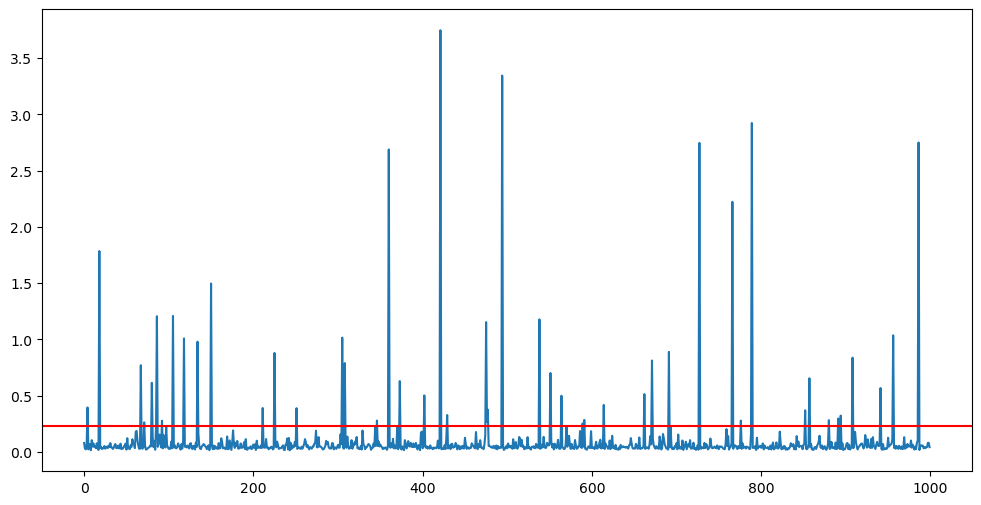

In [143]:
plt.figure(figsize=(12,6))
plt.plot(mse)
plt.axhline(threshold,color='r')

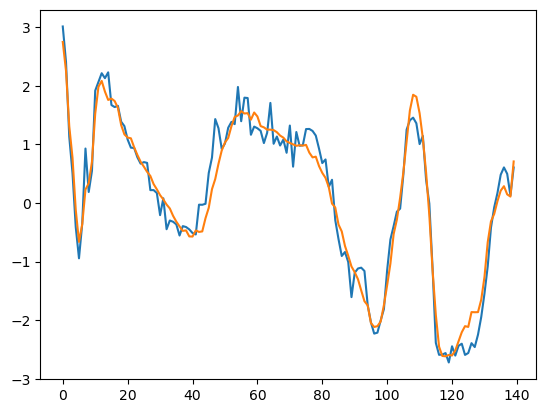

In [144]:
plt.figure()
plt.plot(x_test[0])
plt.plot(y_predict[0])

In [145]:
confusion_matrix(y_test,anomalies)

array([[385,  24],
       [565,  26]], dtype=int64)

In [146]:
plt.figure(figsize = (6, 4.75))



<Figure size 600x475 with 0 Axes>

<Figure size 600x475 with 0 Axes>

In [147]:
import seaborn as sns

